___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [18]:
# Checking the shape of one image
X_train[3].shape

(28, 28)

In [19]:
X_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  33,  96, 175, 156,  64,
         14,  54, 137, 204, 194, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  73, 186, 177, 183, 175, 188, 232,
        255, 223, 219, 194, 179, 186, 213, 146,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  35, 163, 140, 150, 152, 150, 146, 175,
        175, 173, 171, 156, 152, 148, 129, 156, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 150, 142, 140, 152, 160, 156, 146, 142,
        127, 135, 133, 140, 140, 137, 133, 125, 169,  75,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  54, 167, 146, 129, 142, 137, 137, 131,
        148, 148, 133, 131, 131, 131, 125, 140, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 110, 188, 133, 146, 152, 133, 125,
        127, 119, 129, 133, 119, 140, 131, 150,  14,   0,   0,   0,   0,
          0,   0],
       [  

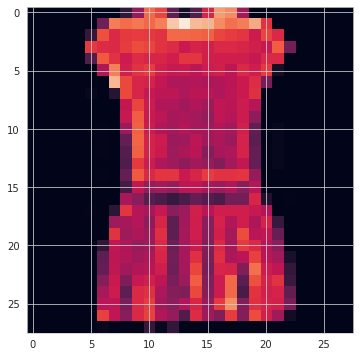

In [21]:
plt.imshow(X_train[3])
# plt.matshow(X_train[3])
plt.show()

In [23]:
y_train.shape

(60000,)

In [24]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
y_train[3]

3

In [25]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

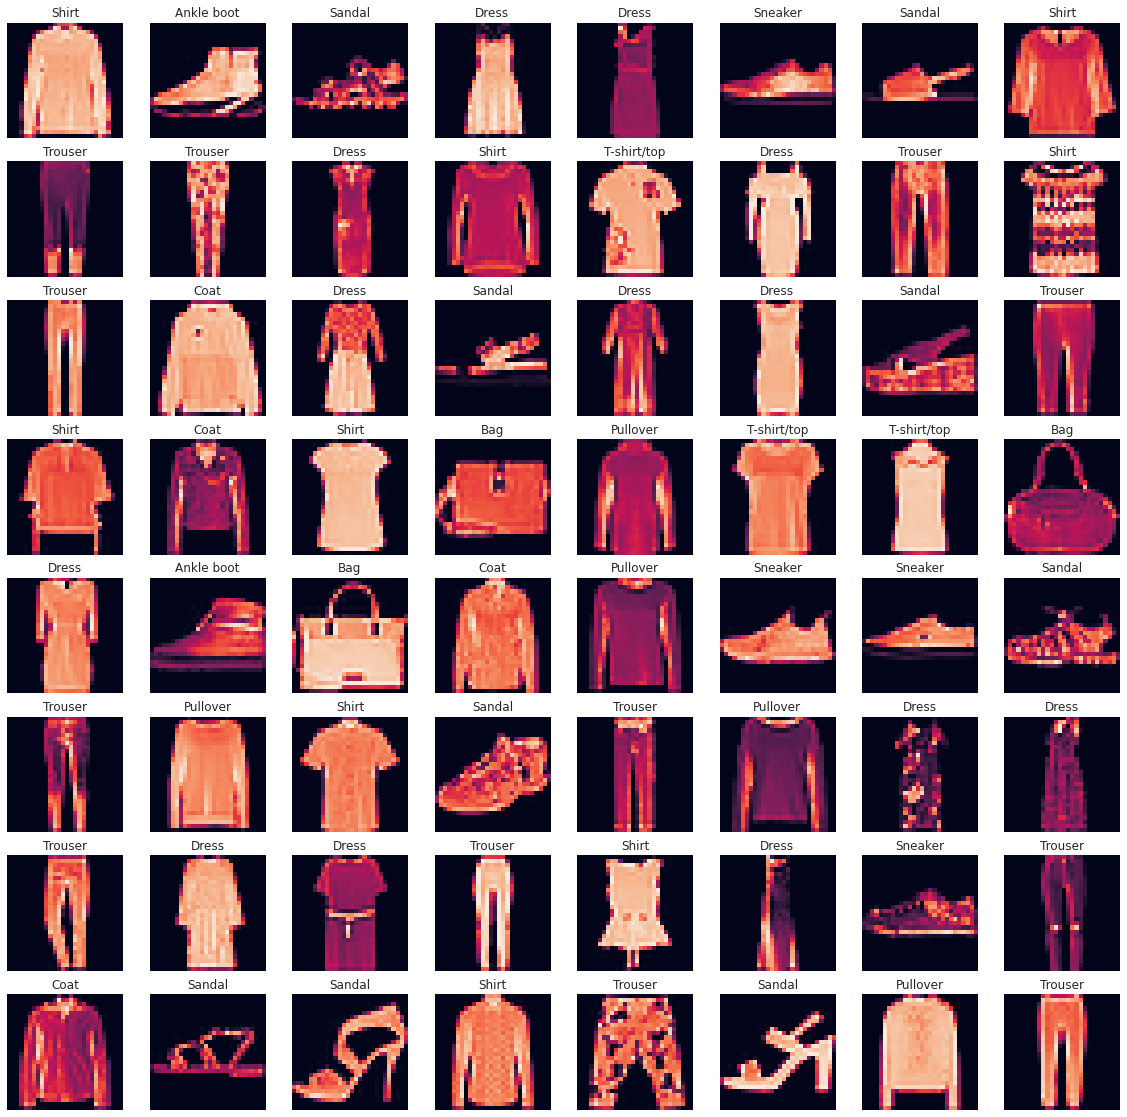

In [26]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

In [12]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [17]:
classes[y_train[6]]

'Sneaker'

In [16]:
classes[int(y_train[1460])]

'T-shirt/top'

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [27]:
X_train[3].min()

0

In [28]:
X_train[3].max()

255

In [29]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [30]:
X_train[3].min()

0.0

In [31]:
X_train[3].max()

1.0

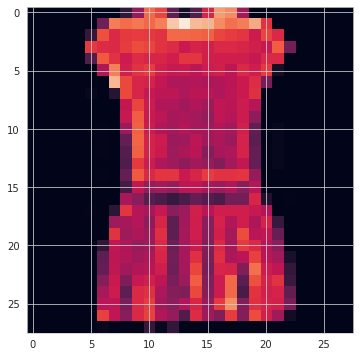

In [32]:
plt.imshow(X_train[3])
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [33]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [34]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [35]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [36]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [37]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [38]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [39]:
from tensorflow.keras.utils import to_categorical

In [40]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [41]:
Y_train[3]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [42]:
y_train[3]

3

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [44]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', strides=(1, 1), padding='same'))  # input_shape=X_train.shape[1:]
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 28)        7084      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 28)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1372)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [46]:
((3* 3 * 1) + 1) * 28

280

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
early_stop = EarlyStopping(monitor='val_loss', mode="min", patience=2, restore_best_weights = True)

In [49]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 17s 4ms/step - loss: 0.4295 - accuracy: 0.8424 - val_loss: 0.3385 - val_accuracy: 0.8764
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2795 - accuracy: 0.8988 - val_loss: 0.3182 - val_accuracy: 0.8861
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2447 - accuracy: 0.9125 - val_loss: 0.2820 - val_accuracy: 0.8962
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2201 - accuracy: 0.9209 - val_loss: 0.3182 - val_accuracy: 0.8936
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2082 - accuracy: 0.9260 - val_loss: 0.3217 - val_accuracy: 0.8853


In [50]:
model.metrics_names

['loss', 'accuracy']

In [51]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.430,0.842,0.339,0.876
1,0.279,0.899,0.318,0.886
2,0.245,0.912,0.282,0.896
3,0.220,0.921,0.318,0.894
4,0.208,0.926,0.322,0.885


**TASK 7: Plot values of metrics you used in your model.**

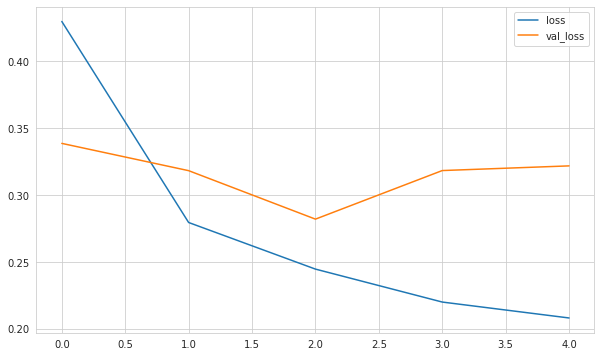

In [52]:
summary[["loss", "val_loss"]].plot();

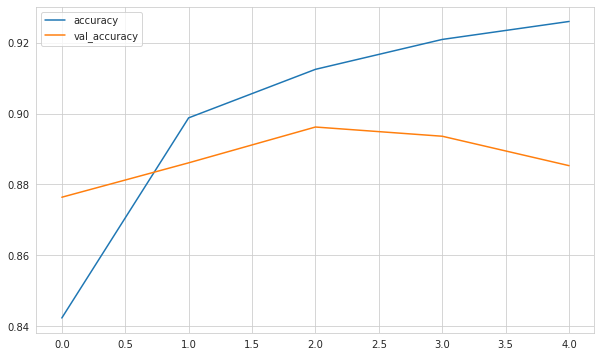

In [53]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2820 - accuracy: 0.8962


[0.2819620668888092, 0.8962000012397766]

In [56]:
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2819620668888092
Test accuracy: 0.8962000012397766


## Prediction

In [57]:
pred_prob = model.predict(X_test)

In [58]:
y_pred = np.argmax(pred_prob, axis=1)

In [59]:
y_pred

array([9, 2, 1, ..., 8, 1, 7])

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1000
           1       0.98      0.98      0.98      1000
           2       0.82      0.87      0.85      1000
           3       0.96      0.81      0.88      1000
           4       0.83      0.83      0.83      1000
           5       0.99      0.97      0.98      1000
           6       0.65      0.81      0.72      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.98      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [61]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [62]:
print(confusion_matrix(y_test, y_pred))

[[758   0  19   7   4   1 203   0   8   0]
 [  0 983   1   6   5   0   4   0   1   0]
 [  6   1 873   3  48   0  69   0   0   0]
 [ 15  19  20 811  54   0  78   0   3   0]
 [  0   0  88   4 835   0  73   0   0   0]
 [  0   0   0   0   0 974   0  17   0   9]
 [ 55   2  59  12  52   0 814   0   6   0]
 [  0   0   0   0   0   2   0 959   2  37]
 [  4   1   4   1   5   1   5   0 979   0]
 [  1   0   0   0   0   5   0  18   0 976]]


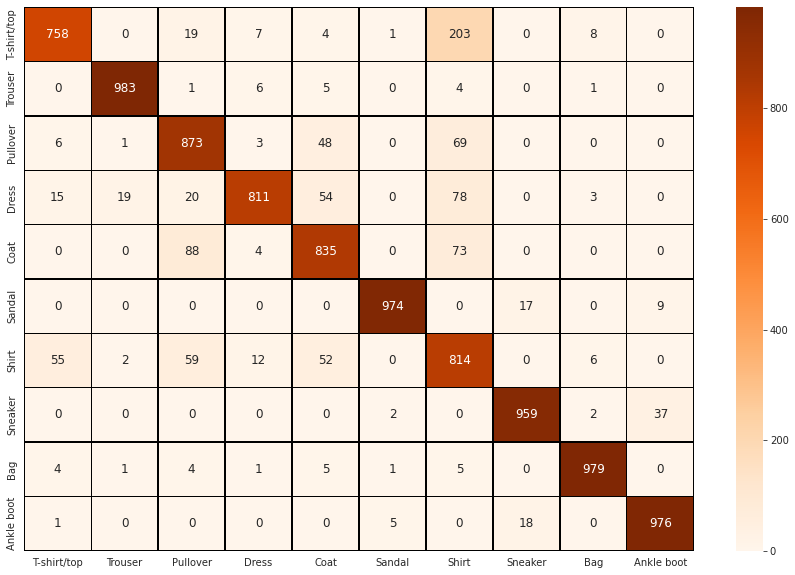

In [69]:
plt.figure(figsize=(15,10))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Oranges", linewidths=.3, linecolor='black', xticklabels=classes, yticklabels=classes, fmt='g', annot_kws = {"size": 12})
plt.show()

In [68]:
(y_test != y_pred).sum() # Total of False predictions

1038

## **Modelling-2**

In [71]:
from tensorflow.keras.layers import BatchNormalization

In [72]:
model2= Sequential()

model2.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=X_train.shape[1:], padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2)))
model2.add(Dropout(0.4))    
model2.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2)))
model2.add(Dropout(0.4))
        
model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(32, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [73]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                      

In [74]:
early_stop = EarlyStopping(monitor='val_accuracy', mode="max", patience=2, restore_best_weights = True)

In [75]:
model2.fit(X_train, Y_train, batch_size=32, epochs=30, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/30
1875/1875 [==============================] - 16s 7ms/step - loss: 0.7499 - accuracy: 0.7449 - val_loss: 0.3457 - val_accuracy: 0.8775
Epoch 2/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4601 - accuracy: 0.8497 - val_loss: 0.3297 - val_accuracy: 0.8861
Epoch 3/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3993 - accuracy: 0.8727 - val_loss: 0.2718 - val_accuracy: 0.9058
Epoch 4/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3656 - accuracy: 0.8847 - val_loss: 0.2700 - val_accuracy: 0.9086
Epoch 5/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3327 - accuracy: 0.8931 - val_loss: 0.2622 - val_accuracy: 0.9095
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3228 - accuracy: 0.8978 - val_loss: 0.2514 - val_accuracy: 0.9110
Epoch 7/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3087 - accuracy: 0.9021 - val_loss: 0.2304 - val_ac

In [77]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.750,0.745,0.346,0.877
1,0.460,0.850,0.330,0.886
2,0.399,0.873,0.272,0.906
3,0.366,0.885,0.270,0.909
4,0.333,0.893,0.262,0.910


Plot values of metrics you used in your model.

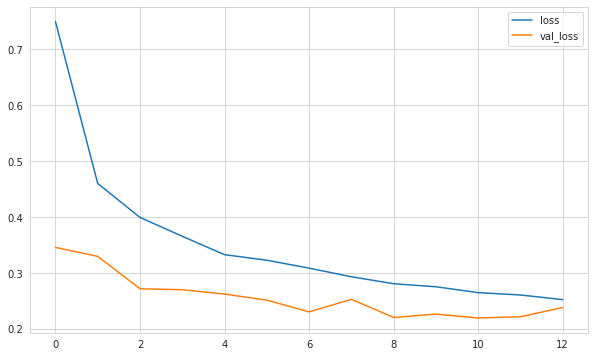

In [78]:
summary[["loss", "val_loss"]].plot();

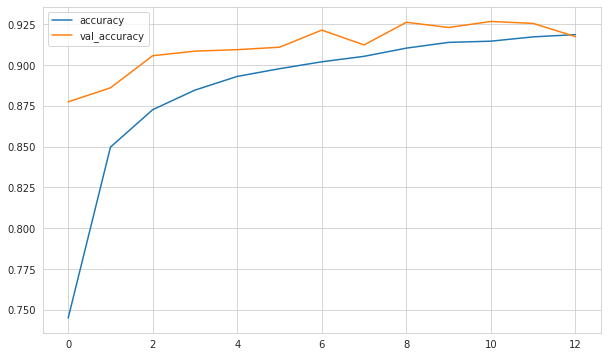

In [79]:
summary[["accuracy", "val_accuracy"]].plot();

# Model Evaluation

TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.

In [82]:
score = model2.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21949125826358795
Test accuracy: 0.926800012588501


# Prediction

In [83]:
pred_prob = model2.predict(X_test)

In [84]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1000
           1       1.00      0.98      0.99      1000
           2       0.90      0.90      0.90      1000
           3       0.92      0.93      0.92      1000
           4       0.85      0.93      0.89      1000
           5       0.99      0.98      0.98      1000
           6       0.84      0.70      0.76      1000
           7       0.96      0.98      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [86]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [87]:
print(confusion_matrix(y_test, y_pred))

[[909   0  20   9   3   1  53   0   5   0]
 [  3 983   0   9   1   0   2   0   2   0]
 [ 11   1 900   9  49   0  30   0   0   0]
 [ 15   1  11 932  18   0  22   0   1   0]
 [  1   0  16  26 933   0  24   0   0   0]
 [  0   0   0   0   0 977   0  17   0   6]
 [127   0  53  28  91   0 696   0   5   0]
 [  0   0   0   0   0   2   0 977   0  21]
 [  1   1   1   5   1   1   0   2 988   0]
 [  0   0   0   0   0   3   0  23   1 973]]


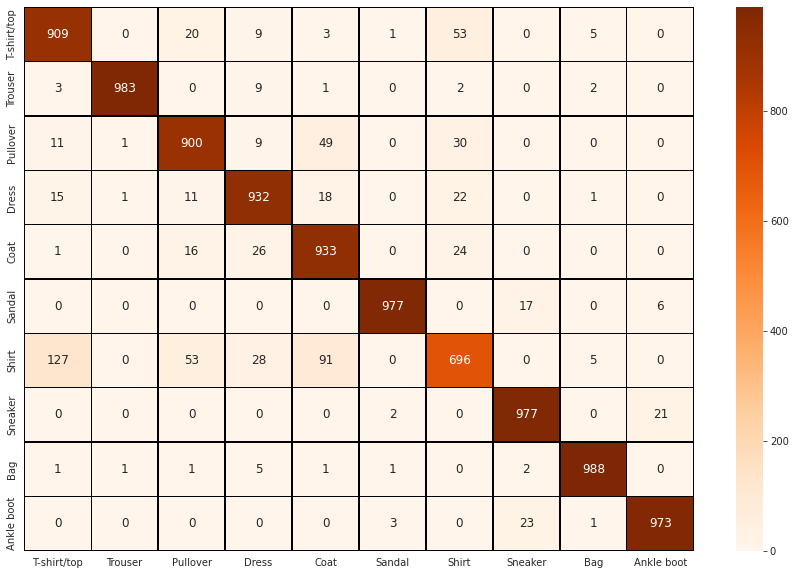

In [88]:
plt.figure(figsize=(15,10))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Oranges", linewidths=.3, xticklabels=classes, yticklabels=classes, linecolor='black', fmt='g', annot_kws = {"size": 12})
plt.show()

In [90]:
(y_test != y_pred).sum()

732

# Prediction

In [91]:
my_image = X_test[3]

In [92]:
my_image.shape

(28, 28, 1)

In [93]:
my_image = my_image.reshape(28,28)

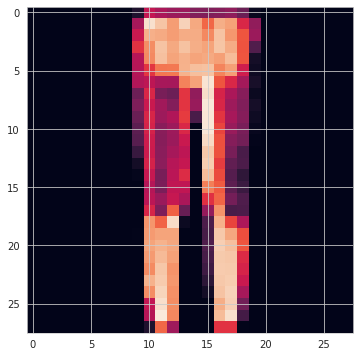

In [94]:
plt.imshow(my_image)

In [95]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

In [96]:
image_prediction

array([[9.7863957e-09, 9.9999952e-01, 2.1232895e-09, 7.9634226e-08,
        2.8881394e-07, 2.1240137e-10, 1.9945785e-08, 2.5735541e-10,
        9.0056940e-10, 3.7281494e-11]], dtype=float32)

In [97]:
np.argmax(image_prediction, axis=1)

array([1])

In [98]:
result=np.argmax(image_prediction, axis=1)

In [99]:
result

array([1])

In [100]:
classes[int(result)]

'Trouser'

In [101]:
model.save("cnn-assignment-2.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___